# Predictive Modeling 
The point of this project is to build on initial data preparation, cleaning, and analysis, enabling us to make assertions vital to organizational needs. In this project, I conduct logistic regression and multiple regression to model the phenomena revealed by data. This project covers normality, homoscedasticity, and significance, preparing us to communicate findings and the limitations of those findings accurately to organizational leaders.

## Competencies 
__Logistic Regression__ <br>
Employs logistic regression algorithms in describing phenomena. 

__Multiple Regression__ <br>
Employs multiple regression algorithms with categorical and numerical predictors in describing phenomena.

__Regression Implications__ <br>
Makes assertions based on regression modeling.

## Write Up
__Research Question__ <br>
What variables influence higher additional charges throughout this hospital chain? 

__Goals__ <br>
The goal and objective of my analysis is to gain a fundamental understanding of the variables that do and do not have an impact on additional charges within the hospital.  

__Summary of Assumptions__ <br>
- Continuous y variable 
- Low multicollinearity
- The residuals being normally distributed
- Homoskedasticity <br>

The y variable in a multiple linear regression model must be continuous and not a categorical variable. “Multicollinearity refers to a linear relationship between any of the x variables,” (Straw, 2023) and these relationships negatively affect the coefficients and therefore negatively affect the overall model. The residuals also need to be normally distributed and address homoskedasticity by having similar variance throughout all x variables.  


My research question focuses on variables that are influential to additional charges in the hospital or the main continuous variable. The use of multiple linear regression helps, “to analyze and understand the relationship between two or more variables of interest.” (Middleton, 2022) Multiple linear regression is a method to determine effective relationships among variables that are in line with the research question indicated in part one.

## Code

In [3]:
# Importing packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns

In [4]:
# Importing medical data CSV and creating the medical_data DataFrame
medical_data = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_clean.csv")

In [5]:
# Looking at columns, non-null counts and data types 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [6]:
# Drop columns that are not needed 
new_med_data = medical_data.drop(columns=['Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Marital', 'TimeZone', 'Job', 'CaseOrder', 'Customer_id','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'])

In [7]:
# Updated data frame 
new_med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Gender              10000 non-null  object 
 4   ReAdmis             10000 non-null  object 
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   Full_meals_eaten    10000 non-null  int64  
 8   vitD_supp           10000 non-null  int64  
 9   Soft_drink          10000 non-null  object 
 10  Initial_admin       10000 non-null  object 
 11  HighBlood           10000 non-null  object 
 12  Stroke              10000 non-null  object 
 13  Complication_risk   10000 non-null  object 
 14  Overweight          10000 non-null  object 
 15  Arthritis           10000 non-null  object 
 16  Diabe

## Data Cleaning 
Data cleaning is an integral part of any data analysis. To make my analysis as accurate as possible, it is necessary to verify that the data is clean. Cleaning the data involves looking at duplicates, missing values, and outliers. 

### Duplicates 
With duplicates in the data, we are exposed to potential integrity threats including causing inaccuracies and skewing the data with unnecessary inflation. The steps used to clean duplicates in the data include the use of .duplicated and .value_counts to look at the counts of duplicates within each variable. 

In [8]:
# Duplicates 
medical_duplicates = new_med_data.duplicated()
print(medical_duplicates.value_counts())

False    10000
Name: count, dtype: int64


### Missing Values 
Missing values can also negatively influence the data similar to duplicates through possible integrity threats like inaccuracies and inflation or deflation of values. Missing values were addressed using the pair of the .isnull() and .sum() function. This looked at each variable and indicated whether any values were missing within that variable. I also verified this information with the use of the missingno library and the msno function to create a matrix to indicate no values were missing. 

In [9]:
# Missing Values 
# Sum of all null values within each column 
new_med_data.isnull().sum()

Children              0
Age                   0
Income                0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

<Axes: >

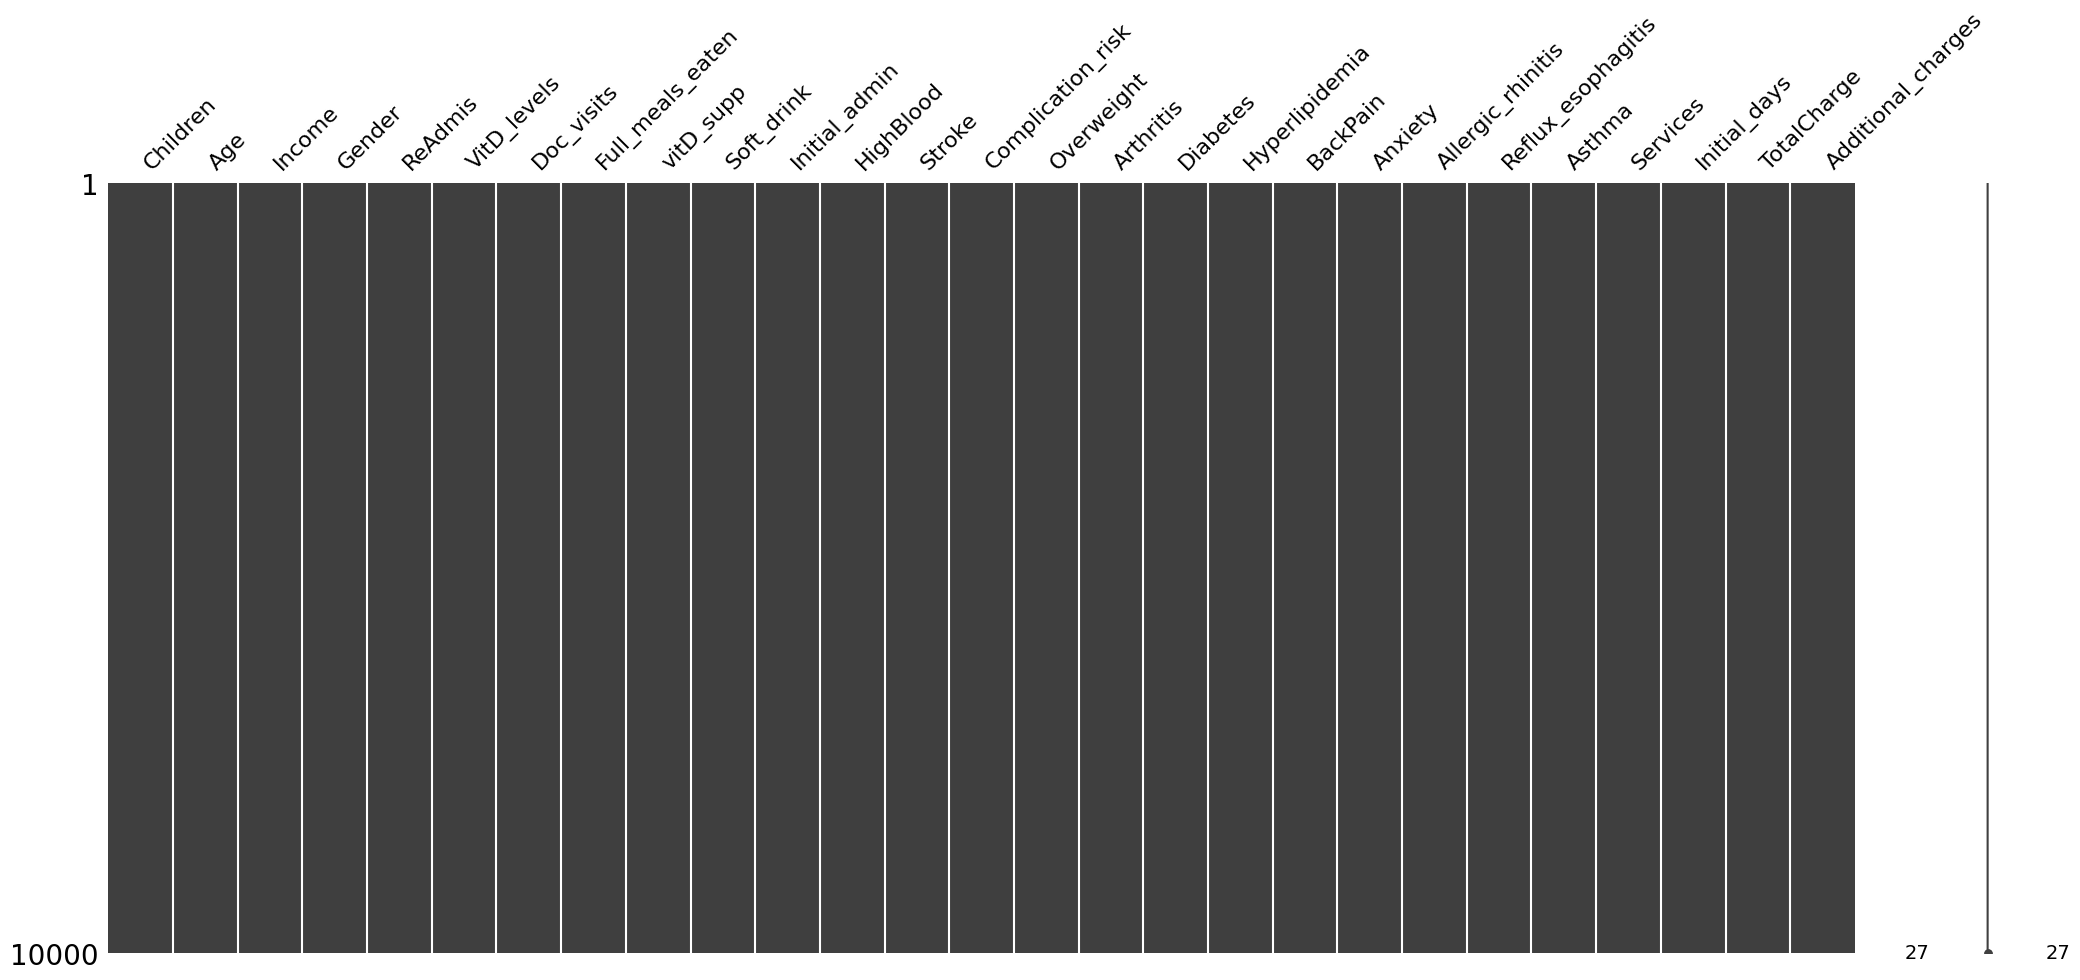

In [10]:
# Double checking no missing values 
msno.matrix(new_med_data) 

### Outliers 
Lastly, outliers can distort relationships or individual measurements which would be detrimental to a multiple linear regression model. The outliers were found using box plots and treated using the replace or imputation technique. I used the 95th percentile of the box plot and used NumPy’s .where() function to replace all values above the 95th percentile with the median of the variable. 

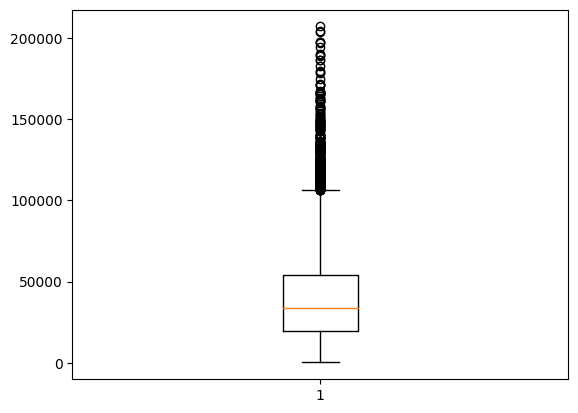

In [12]:
IncomePlot = plt.boxplot(x='Income', data = new_med_data)

In [13]:
# Treat outliers with imputation
percentile_income = np.percentile(new_med_data['Income'], 95)
print(percentile_income)

96071.83099999995


In [14]:
# Replacing with the median
median = float(new_med_data['Income'].median())
new_med_data['Income'] = np.where(new_med_data['Income'] > percentile_income, median, new_med_data['Income'])

In [15]:
# Verifying the max value 
new_med_data.describe()

,Income,Doc_visits,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,36188.024603,5.012200,34.455299,5312.172769,12934.528587
std,21376.715194,1.045734,26.309341,2180.393838,6542.601544
min,154.080000,1.000000,1.001981,1938.312067,3125.703000
25%,19598.775000,4.000000,7.896215,3179.374015,7986.487755
50%,33766.005000,5.000000,35.836244,5213.952000,11573.977735
75%,49348.447500,6.000000,61.161020,7459.699750,15626.490000
max,96067.940000,9.000000,71.981490,9180.728000,30566.070000


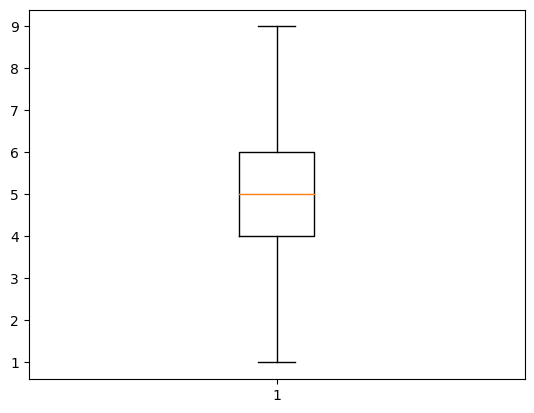

In [16]:
Doc_visitsPlot = plt.boxplot(x='Doc_visits', data = new_med_data)

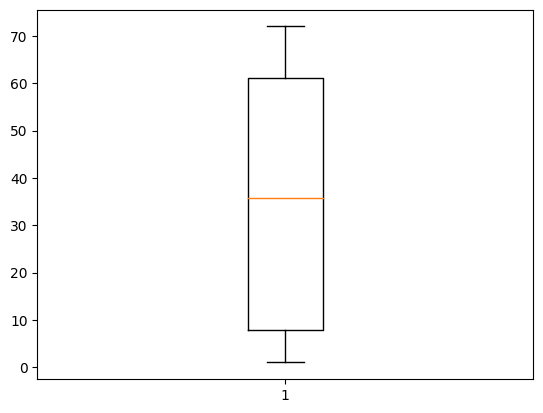

In [17]:
Initial_daysPlot = plt.boxplot(x='Initial_days', data = new_med_data)

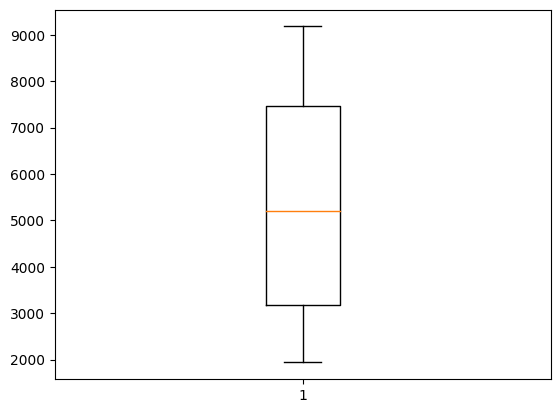

In [18]:
TotalChargePlot = plt.boxplot(x='TotalCharge', data = new_med_data)

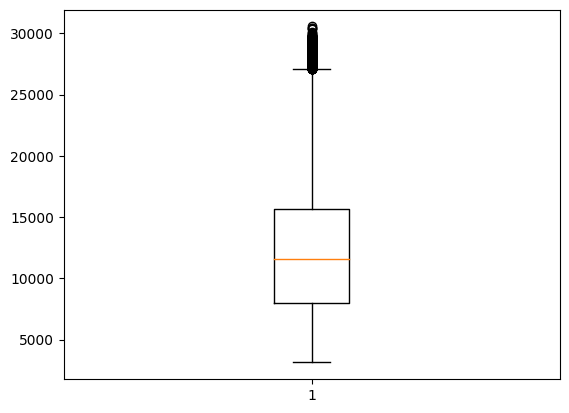

In [19]:
Additional_chargesPlot = plt.boxplot(x='Additional_charges', data = new_med_data)

In [20]:
# Treat outliers with imputation
percentile_addcharges = np.percentile(new_med_data['Additional_charges'], 95)
print(percentile_addcharges)

26604.554999999997


In [21]:
# Replacing with the median
median = float(new_med_data['Additional_charges'].median())
new_med_data['Additional_charges'] = np.where(new_med_data['Additional_charges'] > percentile_addcharges, median, new_med_data['Additional_charges'])

In [22]:
# Verifying the max value 
new_med_data.describe()

,Income,Doc_visits,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,36188.024603,5.012200,34.455299,5312.172769,12108.260572
std,21376.715194,1.045734,26.309341,2180.393838,5538.630675
min,154.080000,1.000000,1.001981,1938.312067,3125.703000
25%,19598.775000,4.000000,7.896215,3179.374015,7986.487755
50%,33766.005000,5.000000,35.836244,5213.952000,11573.938868
75%,49348.447500,6.000000,61.161020,7459.699750,14535.582983
max,96067.940000,9.000000,71.981490,9180.728000,26604.310000


In [23]:
# EDA - Looking at descriptive statistics
new_med_data.describe()

,Income,Doc_visits,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,36188.024603,5.012200,34.455299,5312.172769,12108.260572
std,21376.715194,1.045734,26.309341,2180.393838,5538.630675
min,154.080000,1.000000,1.001981,1938.312067,3125.703000
25%,19598.775000,4.000000,7.896215,3179.374015,7986.487755
50%,33766.005000,5.000000,35.836244,5213.952000,11573.938868
75%,49348.447500,6.000000,61.161020,7459.699750,14535.582983
max,96067.940000,9.000000,71.981490,9180.728000,26604.310000


In [24]:
# Qualitative/categorical descriptive data
new_med_data.describe(include='object')

,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Anxiety,Services
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,3,2,2,2,2,4
top,No,No,Medium,Yes,No,No,No,Blood Work
freq,5910,8007,4517,7094,6426,7262,6785,5265


In [25]:
# Univariate - Additional Charges
new_med_data['Additional_charges'].describe()

count    10000.000000
mean     12108.260572
std       5538.630675
min       3125.703000
25%       7986.487755
50%      11573.938868
75%      14535.582983
max      26604.310000
Name: Additional_charges, dtype: float64

Text(0.5, 1.0, 'Univariate Statistics - Additional Charges')

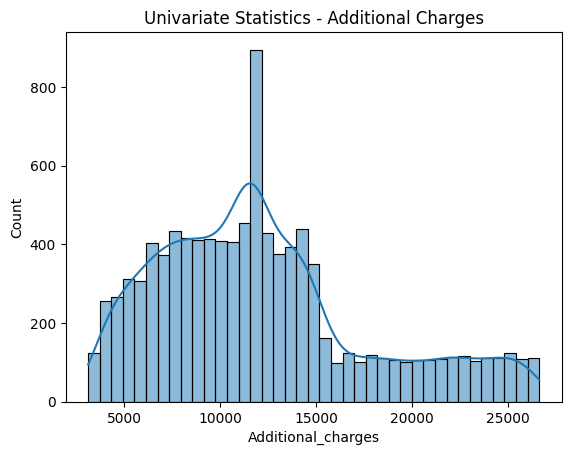

In [26]:
# Histogram Plot - Additional Charges 
sns.histplot(new_med_data.Additional_charges,kde=True)
plt.title("Univariate Statistics - Additional Charges")

In [27]:
# Univariate - Total Charges
new_med_data['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

Text(0.5, 1.0, 'Univariate Statistics - Total Charges')

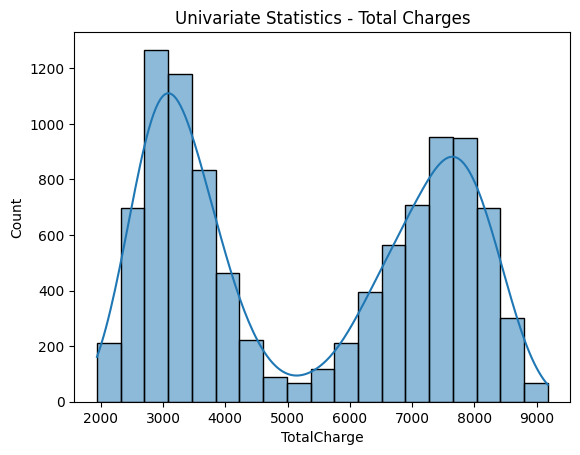

In [28]:
# Histogram - Total Charges 
sns.histplot(new_med_data.TotalCharge,kde=True)
plt.title("Univariate Statistics - Total Charges")

In [29]:
# Univariate - Income
new_med_data['Income'].describe()

count    10000.000000
mean     36188.024603
std      21376.715194
min        154.080000
25%      19598.775000
50%      33766.005000
75%      49348.447500
max      96067.940000
Name: Income, dtype: float64

Text(0.5, 1.0, 'Univariate Statistics - Income')

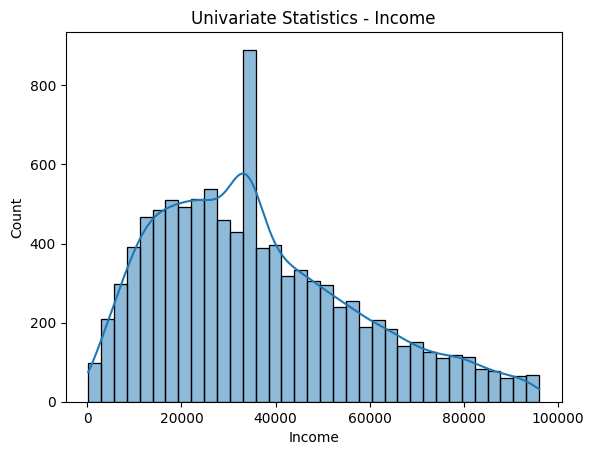

In [30]:
# Histogram - Income
sns.histplot(new_med_data.Income,kde=True)
plt.title("Univariate Statistics - Income")

In [31]:
# Univariate - Doctor Visits
new_med_data['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

Text(0.5, 1.0, 'Univariate Statistics - Doctor Visits')

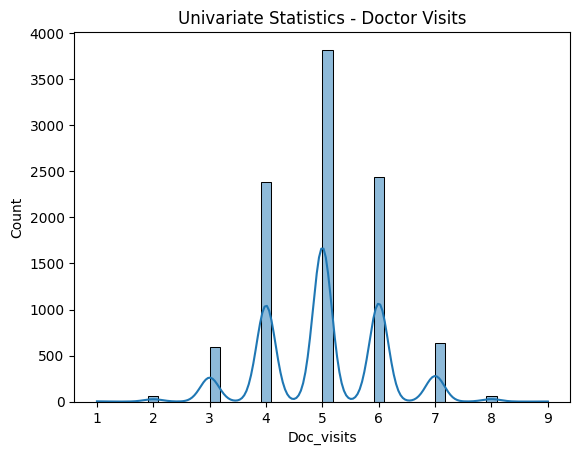

In [32]:
# Histogram - Doctor Visits
sns.histplot(new_med_data.Doc_visits,kde=True)
plt.title("Univariate Statistics - Doctor Visits")

In [33]:
# Univariate - Initial Days
new_med_data['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

Text(0.5, 1.0, 'Univariate Statistics - Initial Days')

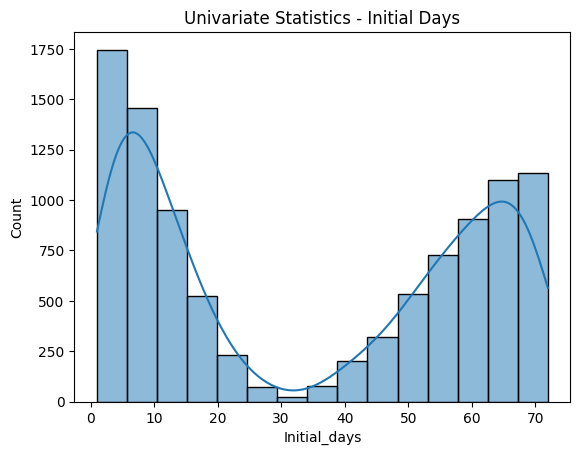

In [34]:
# Histogram - Initial Days
sns.histplot(new_med_data.Initial_days,kde=True)
plt.title("Univariate Statistics - Initial Days")

In [35]:
# Univariate - Services Variable
new_med_data['Services'].describe()

count          10000
unique             4
top       Blood Work
freq            5265
Name: Services, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Services')

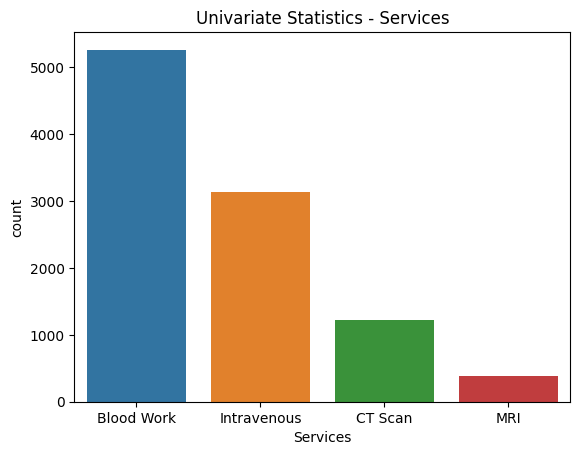

In [36]:
# Count Plot - Services 
sns.countplot(data=new_med_data, x='Services')
plt.title("Univariate Statistics - Services")

In [37]:
# Univariate - Complication Risk 
new_med_data['Complication_risk'].describe()

count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Complication Risk')

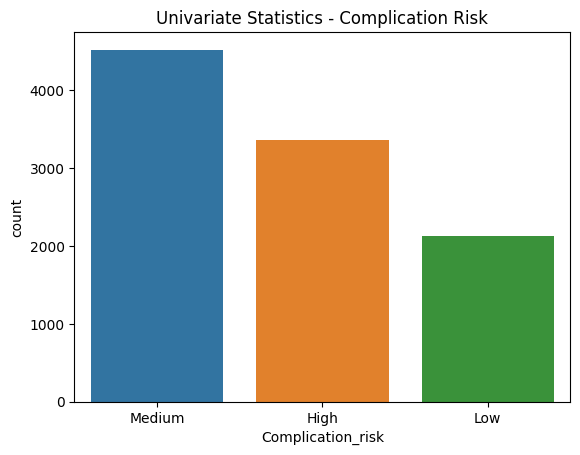

In [38]:
# Count Plot - Complication Risk 
sns.countplot(data=new_med_data, x='Complication_risk')
plt.title("Univariate Statistics - Complication Risk")

In [39]:
# Univariate - High Blood Pressure
new_med_data['HighBlood'].describe()

count     10000
unique        2
top          No
freq       5910
Name: HighBlood, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - High Blood')

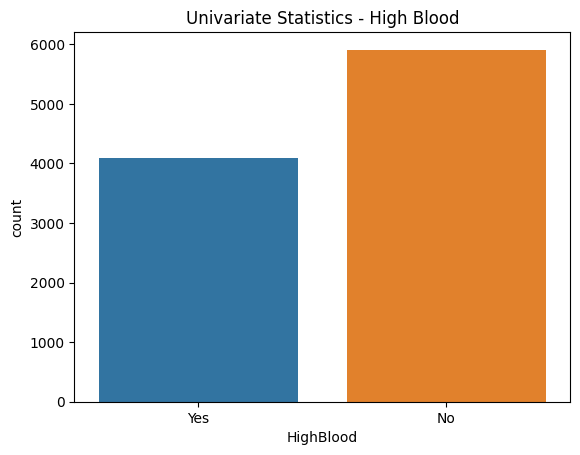

In [40]:
# Count Plot - High Blood Pressure 
sns.countplot(data=new_med_data, x='HighBlood')
plt.title("Univariate Statistics - High Blood")

In [41]:
# Univariate - Stroke
new_med_data['Stroke'].describe()

count     10000
unique        2
top          No
freq       8007
Name: Stroke, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Stroke')

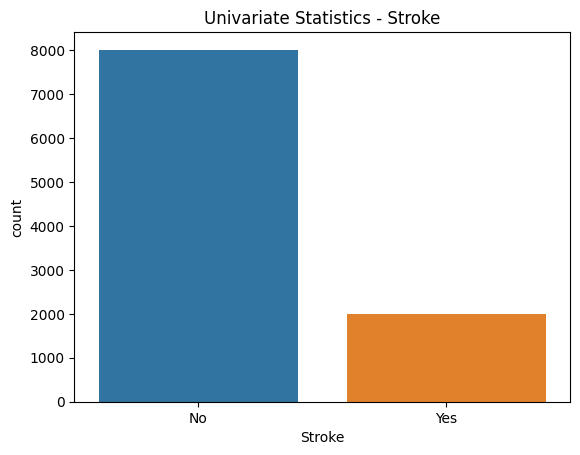

In [42]:
# Count Plot - Stroke 
sns.countplot(data=new_med_data, x='Stroke')
plt.title("Univariate Statistics - Stroke")

In [43]:
# Univariate - Arthritis
new_med_data['Arthritis'].describe()

count     10000
unique        2
top          No
freq       6426
Name: Arthritis, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Arthritis')

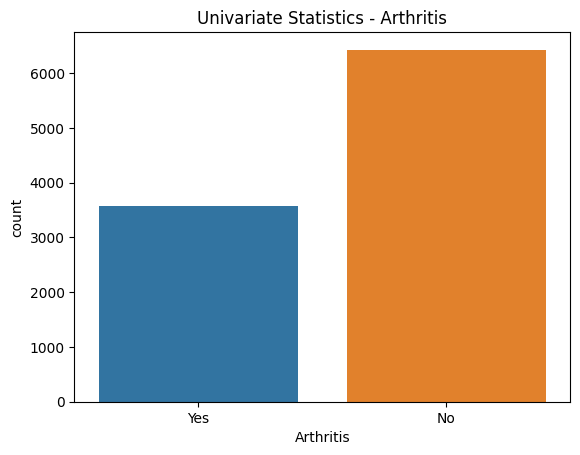

In [44]:
# Count Plot - Arthritis
sns.countplot(data=new_med_data, x='Arthritis')
plt.title("Univariate Statistics - Arthritis")

In [45]:
# Univariate - Overweight
new_med_data['Overweight'].describe()

count     10000
unique        2
top         Yes
freq       7094
Name: Overweight, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Overweight')

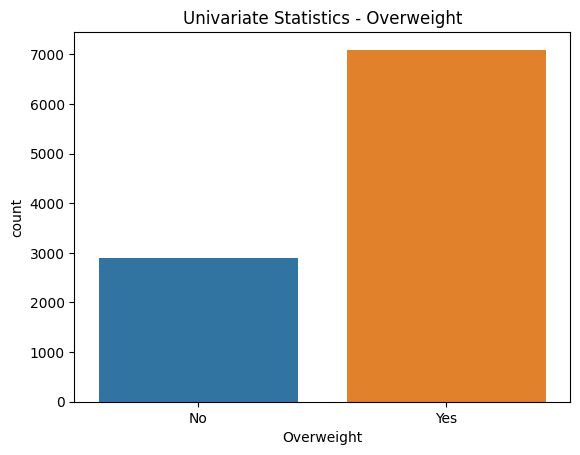

In [46]:
# Count Plot - Overweight
sns.countplot(data=new_med_data, x='Overweight')
plt.title("Univariate Statistics - Overweight")

In [47]:
# Univariate - Diabetes
new_med_data['Diabetes'].describe()

count     10000
unique        2
top          No
freq       7262
Name: Diabetes, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Diabetes')

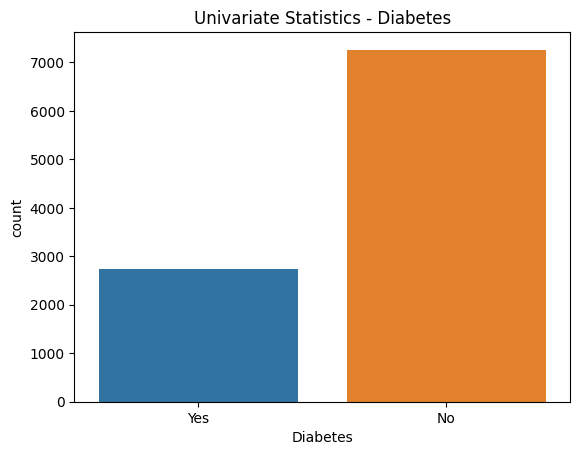

In [48]:
# Count Plot - Diabetes 
sns.countplot(data=new_med_data, x='Diabetes')
plt.title("Univariate Statistics - Diabetes")

In [49]:
# Univariate - Anxiety
new_med_data['Anxiety'].describe()

count     10000
unique        2
top          No
freq       6785
Name: Anxiety, dtype: object

Text(0.5, 1.0, 'Univariate Statistics - Anxiety')

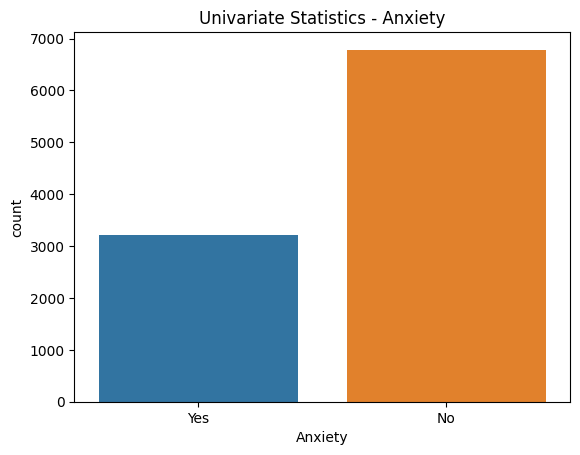

In [50]:
# Count Plot - Anxiety 
sns.countplot(data=new_med_data, x='Anxiety')
plt.title("Univariate Statistics - Anxiety")

In [51]:
# Bivariate Statistics 
# Additional Charges vs Total Charges 
new_med_data[['Additional_charges', 'TotalCharge']].describe()

,Additional_charges,TotalCharge
count,10000.000000,10000.000000
mean,12108.260572,5312.172769
std,5538.630675,2180.393838
min,3125.703000,1938.312067
25%,7986.487755,3179.374015
50%,11573.938868,5213.952000
75%,14535.582983,7459.699750
max,26604.310000,9180.728000


In [52]:
# Additional Charges vs Total Charges correlation 
new_med_data[['Additional_charges', 'TotalCharge']].corr()

,Additional_charges,TotalCharge
Additional_charges,1.000000,0.028396
TotalCharge,0.028396,1.000000


Text(0.5, 1.0, 'Bivariate Statistics - Total Charge vs Additional Charges Distribution')

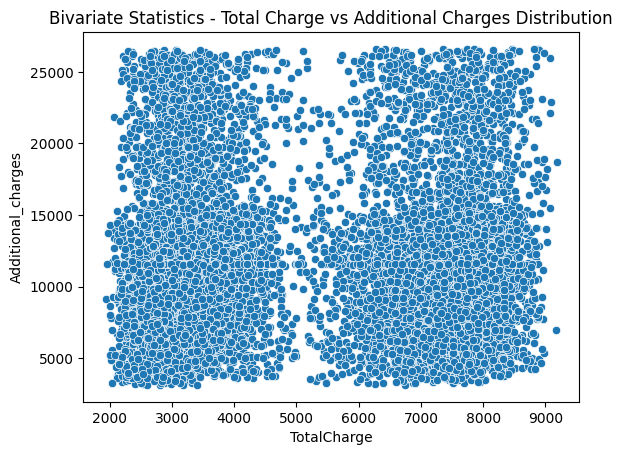

In [53]:
# Additional Charges vs Total Charges scatterplot 
sns.scatterplot(data=new_med_data, x='TotalCharge', y='Additional_charges')
plt.title("Bivariate Statistics - Total Charge vs Additional Charges Distribution")

In [54]:
# Bivariate Statistics 
# Additional Charges vs Income
new_med_data[['Additional_charges', 'Income']].describe()

,Additional_charges,Income
count,10000.000000,10000.000000
mean,12108.260572,36188.024603
std,5538.630675,21376.715194
min,3125.703000,154.080000
25%,7986.487755,19598.775000
50%,11573.938868,33766.005000
75%,14535.582983,49348.447500
max,26604.310000,96067.940000


In [55]:
# Additional Charges vs Income correlation 
new_med_data[['Additional_charges', 'Income']].corr()

,Additional_charges,Income
Additional_charges,1.000000,-0.005247
Income,-0.005247,1.000000


Text(0.5, 1.0, 'Bivariate Statistics - Income vs Additional Charges Distribution')

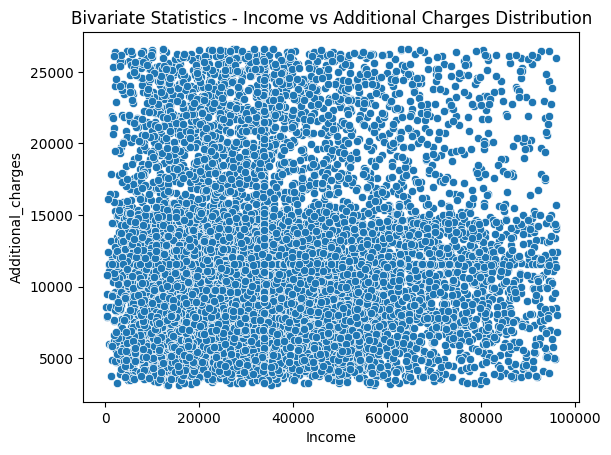

In [56]:
# Additional Charges vs Income plot 
sns.scatterplot(data=new_med_data, x='Income', y='Additional_charges')
plt.title("Bivariate Statistics - Income vs Additional Charges Distribution")

In [57]:
# Bivariate Statistics 
# Additional charges vs doc visits 
new_med_data[['Additional_charges', 'Doc_visits']].describe()

,Additional_charges,Doc_visits
count,10000.000000,10000.000000
mean,12108.260572,5.012200
std,5538.630675,1.045734
min,3125.703000,1.000000
25%,7986.487755,4.000000
50%,11573.938868,5.000000
75%,14535.582983,6.000000
max,26604.310000,9.000000


In [58]:
# Additional charges vs doc visits correlation 
new_med_data[['Additional_charges', 'Doc_visits']].corr()

,Additional_charges,Doc_visits
Additional_charges,1.000000,0.009862
Doc_visits,0.009862,1.000000


Text(0.5, 1.0, 'Bivariate Statistics - Doc Visits vs Additional Charges Distribution')

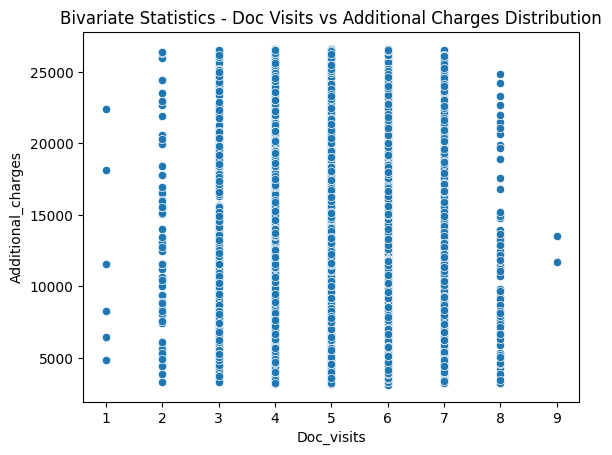

In [59]:
# Additional charges vs doc visits plot  
sns.scatterplot(data=new_med_data, x='Doc_visits', y='Additional_charges')
plt.title("Bivariate Statistics - Doc Visits vs Additional Charges Distribution")

In [60]:
# Bivariate Statistics 
# Additional Charges vs Initial days
new_med_data[['Additional_charges', 'Initial_days']].describe()

,Additional_charges,Initial_days
count,10000.000000,10000.000000
mean,12108.260572,34.455299
std,5538.630675,26.309341
min,3125.703000,1.001981
25%,7986.487755,7.896215
50%,11573.938868,35.836244
75%,14535.582983,61.161020
max,26604.310000,71.981490


In [61]:
# Additional Charges vs Initial days correlation 
new_med_data[['Additional_charges', 'Initial_days']].corr()

,Additional_charges,Initial_days
Additional_charges,1.00000,0.00634
Initial_days,0.00634,1.00000


Text(0.5, 1.0, 'Bivariate Statistics - Initial Days vs Additional Charges Distribution')

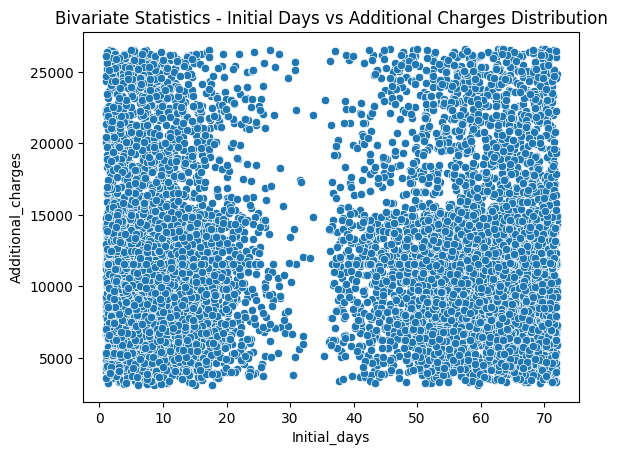

In [62]:
# Additional Charges vs Initial days plot 
sns.scatterplot(data=new_med_data, x='Initial_days', y='Additional_charges')
plt.title("Bivariate Statistics - Initial Days vs Additional Charges Distribution")

In [63]:
# Bivariate (categorical values) 
# Additional charges vs Services 
pd.crosstab(new_med_data.Additional_charges, new_med_data.Services, margins=True)

Services,Blood Work,CT Scan,Intravenous,MRI,All
Additional_charges,,,,,
3125.703,1,0,0,0,1
3132.25999,1,0,1,0,2
3139.049369,2,0,0,0,2
3173.112679,0,1,0,0,1
3213.0799,1,0,0,0,1
...,...,...,...,...,...
26592.28,1,0,0,0,1
26594.73,0,1,0,0,1
26601.03,0,0,0,1,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

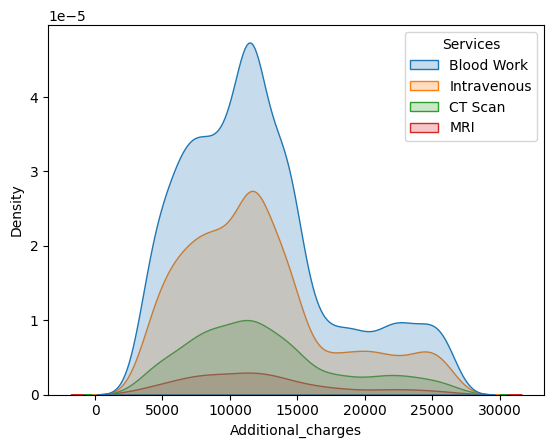

In [64]:
# Bivariate (categorical values) 
# Additional charges vs Services 
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='Services', fill=True)

In [65]:
# Bivariate (categorical values) 
# Additional charges vs Complication risk  
pd.crosstab(new_med_data.Additional_charges, new_med_data.Complication_risk, margins=True)

Complication_risk,High,Low,Medium,All
Additional_charges,,,,
3125.703,0,1,0,1
3132.25999,0,2,0,2
3139.049369,0,2,0,2
3173.112679,0,1,0,1
3213.0799,0,0,1,1
...,...,...,...,...
26592.28,0,0,1,1
26594.73,1,0,0,1
26601.03,1,0,0,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

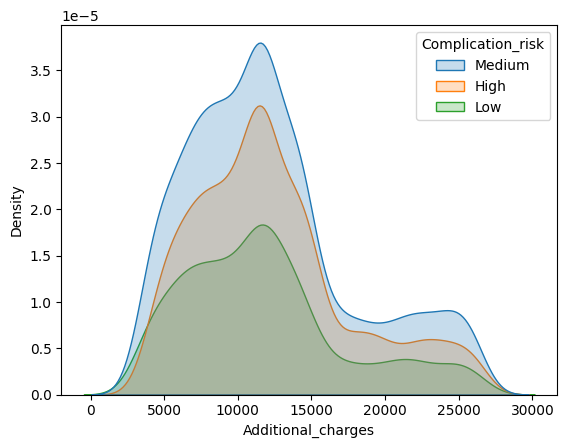

In [66]:
# Bivariate (categorical values) 
# Additional charges vs Complication risk  
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='Complication_risk', fill=True)

In [67]:
# Bivariate (categorical values) 
# Additional charges vs High Blood 
pd.crosstab(new_med_data.Additional_charges, new_med_data.HighBlood, margins=True)

HighBlood,No,Yes,All
Additional_charges,,,
3125.703,1,0,1
3132.25999,2,0,2
3139.049369,2,0,2
3173.112679,1,0,1
3213.0799,1,0,1
...,...,...,...
26592.28,0,1,1
26594.73,0,1,1
26601.03,0,1,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

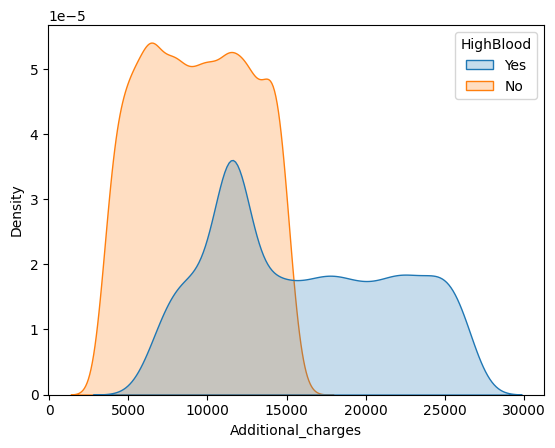

In [68]:
# Bivariate (categorical values) 
# Additional charges vs High Blood 
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='HighBlood', fill=True)

In [69]:
# Bivariate (categorical values) 
# Additional charges vs Stroke
pd.crosstab(new_med_data.Additional_charges, new_med_data.Stroke, margins=True)

Stroke,No,Yes,All
Additional_charges,,,
3125.703,1,0,1
3132.25999,2,0,2
3139.049369,2,0,2
3173.112679,1,0,1
3213.0799,1,0,1
...,...,...,...
26592.28,0,1,1
26594.73,0,1,1
26601.03,1,0,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

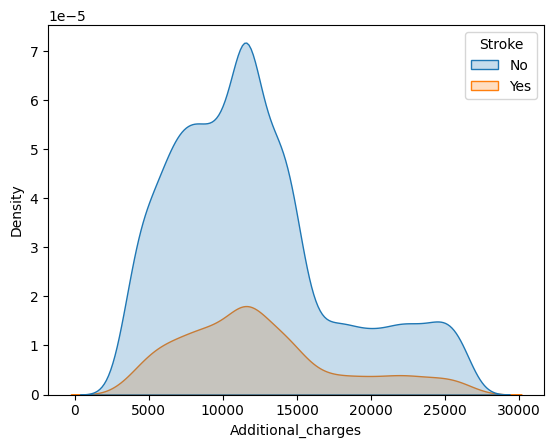

In [70]:
# Bivariate (categorical values) 
# Additional charges vs Stroke
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='Stroke', fill=True)

In [71]:
# Bivariate (categorical values) 
# Additional charges vs Arthritis
pd.crosstab(new_med_data.Additional_charges, new_med_data.Arthritis, margins=True)

Arthritis,No,Yes,All
Additional_charges,,,
3125.703,1,0,1
3132.25999,2,0,2
3139.049369,1,1,2
3173.112679,1,0,1
3213.0799,1,0,1
...,...,...,...
26592.28,1,0,1
26594.73,0,1,1
26601.03,1,0,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

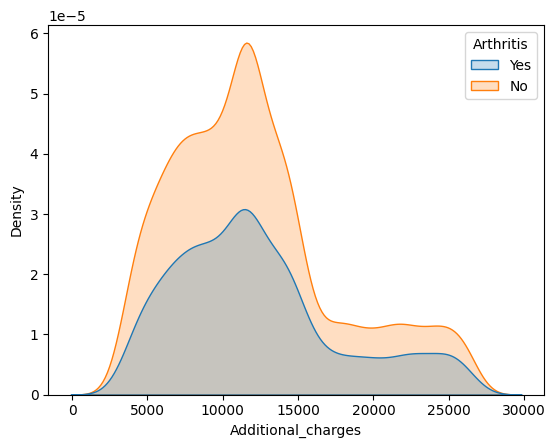

In [72]:
# Bivariate (categorical values) 
# Additional charges vs Arthritis
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='Arthritis', fill=True)

In [73]:
# Bivariate (categorical values) 
# Additional charges vs Overweight
pd.crosstab(new_med_data.Additional_charges, new_med_data.Overweight, margins=True)

Overweight,No,Yes,All
Additional_charges,,,
3125.703,1,0,1
3132.25999,0,2,2
3139.049369,0,2,2
3173.112679,1,0,1
3213.0799,0,1,1
...,...,...,...
26592.28,0,1,1
26594.73,0,1,1
26601.03,0,1,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

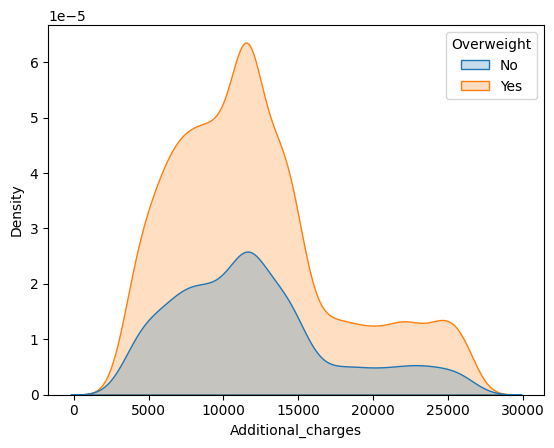

In [74]:
# Bivariate (categorical values) 
# Additional charges vs Overweight
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='Overweight', fill=True)

In [75]:
# Bivariate (categorical values) 
# Additional charges vs Diabetes
pd.crosstab(new_med_data.Additional_charges, new_med_data.Diabetes, margins=True)

Diabetes,No,Yes,All
Additional_charges,,,
3125.703,1,0,1
3132.25999,2,0,2
3139.049369,2,0,2
3173.112679,1,0,1
3213.0799,1,0,1
...,...,...,...
26592.28,1,0,1
26594.73,0,1,1
26601.03,1,0,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

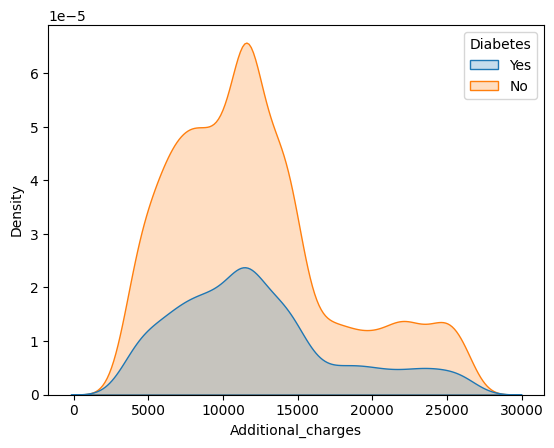

In [76]:
# Bivariate (categorical values) 
# Additional charges vs Diabetes
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='Diabetes', fill=True)

In [77]:
# Bivariate (categorical values) 
# Additional charges vs Anxiety
pd.crosstab(new_med_data.Additional_charges, new_med_data.Anxiety, margins=True)

Anxiety,No,Yes,All
Additional_charges,,,
3125.703,1,0,1
3132.25999,1,1,2
3139.049369,1,1,2
3173.112679,1,0,1
3213.0799,0,1,1
...,...,...,...
26592.28,1,0,1
26594.73,1,0,1
26601.03,0,1,1


<Axes: xlabel='Additional_charges', ylabel='Density'>

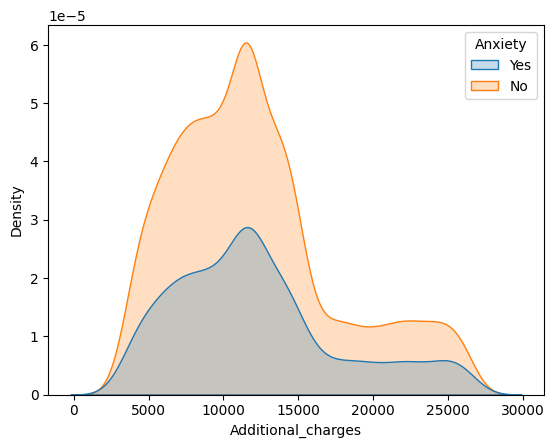

In [78]:
# Bivariate (categorical values) 
# Additional charges vs Anxiety
sns.kdeplot(data=new_med_data, x='Additional_charges', hue='Anxiety', fill=True)

## Data Transformation 

My data transformation goals include changing categorical data to numerical data through the re-expression of categorical variables. Due to most statistical methods only working with numerical data, we had to change the categorical data to represent numerical values. I performed re-expression on ordinal data and nominal categorical data using the ordinal encoder technique and one hot encoding. 

Ordinal data was re-expressed with an ordinal encoder technique. This technique started with creating a new column to insert the new values into. Next, a dictionary was created to easily distinguish the most valuable to the least valuable or in this case yes as the most valuable or 1 and no as the least valuable or 0. It is also worth mentioning the one other instance of ordinal data that included low, medium, and high values instead of Boolean values that were encoded as 0,1,2 respectively. The last step was to use the replace function in Python to replace the categorical values with the defined numerical values. 

Nominal data was re-expressed with one hot encoding. There was one variable that had categorical data that was nominal: services. I used the function get dummies within the pandas library to create new variables called dummy variables that, “contain a binary encoding (0 or 1) to denote whether a particular row belongs to this category.” (Middleton, 2022) The services variable had four possible values and with the get dummies function, we can follow the k-1 rule to mitigate multicollinearity and retain 3 of the 4 dummy variables using the drop_first=True rule. Instead of using the services categorical variable, we now were able to use the 3 remaining dummy variables. 

In [79]:
# Data Wrangling 
# Re-expression 
new_med_data.HighBlood.unique()

array(['Yes', 'No'], dtype=object)

In [80]:
# 2. Create new column to input into 
new_med_data['HighBlood_numeric'] = new_med_data['HighBlood']

In [81]:
# 3. Create dictionary for the values 
dict_highblood = {"HighBlood_numeric": {"Yes": 1, "No": 0}}
new_med_data.replace(dict_highblood, inplace = True)

In [82]:
new_med_data.HighBlood_numeric.unique()

array([1, 0], dtype=int64)

In [83]:
# Data Wrangling 
# Re-expression 
new_med_data.Stroke.unique()

array(['No', 'Yes'], dtype=object)

In [84]:
# 2. Create new column to input into 
new_med_data['Stroke_numeric'] = new_med_data['Stroke']

In [85]:
# 3. Create dictionary for the values 
dict_stroke = {"Stroke_numeric": {"Yes": 1, "No": 0}}
new_med_data.replace(dict_stroke, inplace = True)

In [86]:
# Data Wrangling 
# Re-expression 
new_med_data.Arthritis.unique()

array(['Yes', 'No'], dtype=object)

In [87]:
# 2. Create new column to input into 
new_med_data['Arthritis_numeric'] = new_med_data['Arthritis']

In [88]:
# 3. Create dictionary for the values 
dict_arthritis = {"Arthritis_numeric": {"Yes": 1, "No": 0}}
new_med_data.replace(dict_arthritis, inplace = True)

In [89]:
# Data Wrangling 
# Re-expression 
new_med_data.Overweight.unique()

array(['No', 'Yes'], dtype=object)

In [90]:
# 2. Create new column to input into 
new_med_data['Overweight_numeric'] = new_med_data['Overweight']

In [91]:
# 3. Create dictionary for the values 
dict_overweight = {"Overweight_numeric": {"Yes": 1, "No": 0}}
new_med_data.replace(dict_overweight, inplace = True)

In [92]:
# Data Wrangling 
# Re-expression 
new_med_data.Diabetes.unique()

array(['Yes', 'No'], dtype=object)

In [93]:
# 2. Create new column to input into 
new_med_data['Diabetes_numeric'] = new_med_data['Diabetes']

In [94]:
# 3. Create dictionary for the values 
dict_diabetes = {"Diabetes_numeric": {"Yes": 1, "No": 0}}
new_med_data.replace(dict_diabetes, inplace = True)

In [95]:
# Data Wrangling 
# Re-expression 
new_med_data.Anxiety.unique()

array(['Yes', 'No'], dtype=object)

In [96]:
# 2. Create new column to input into 
new_med_data['Anxiety_numeric'] = new_med_data['Anxiety']

In [97]:
# 3. Create dictionary for the values 
dict_anxiety = {"Anxiety_numeric": {"Yes": 1, "No": 0}}
new_med_data.replace(dict_anxiety, inplace = True)

In [98]:
# Data Wrangling 
# Re-expression 
new_med_data.Complication_risk.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [99]:
# 2. Create new column to input into 
new_med_data['Complication_risk_numeric'] = new_med_data['Complication_risk']

In [100]:
# 3. Create dictionary for the values 
dict_complication = {"Complication_risk_numeric": {"Low": 0, "Medium": 1, "High": 2}}
new_med_data.replace(dict_complication, inplace = True)

In [102]:
# Look at all column names to start developing the model 
new_med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     10000 non-null  float64
 1   Doc_visits                 10000 non-null  int64  
 2   HighBlood                  10000 non-null  object 
 3   Stroke                     10000 non-null  object 
 4   Complication_risk          10000 non-null  object 
 5   Overweight                 10000 non-null  object 
 6   Arthritis                  10000 non-null  object 
 7   Diabetes                   10000 non-null  object 
 8   Anxiety                    10000 non-null  object 
 9   Services                   10000 non-null  object 
 10  Initial_days               10000 non-null  float64
 11  TotalCharge                10000 non-null  float64
 12  Additional_charges         10000 non-null  float64
 13  HighBlood_numeric          10000 non-null  int6

In [103]:
# Drop columns that are not needed 
new_med_data = new_med_data.drop(columns=['HighBlood','Stroke','Complication_risk','Overweight','Anxiety','Arthritis','Diabetes'])

In [104]:
new_med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Income                     10000 non-null  float64
 1   Doc_visits                 10000 non-null  int64  
 2   Services                   10000 non-null  object 
 3   Initial_days               10000 non-null  float64
 4   TotalCharge                10000 non-null  float64
 5   Additional_charges         10000 non-null  float64
 6   HighBlood_numeric          10000 non-null  int64  
 7   Stroke_numeric             10000 non-null  int64  
 8   Arthritis_numeric          10000 non-null  int64  
 9   Overweight_numeric         10000 non-null  int64  
 10  Diabetes_numeric           10000 non-null  int64  
 11  Anxiety_numeric            10000 non-null  int64  
 12  Complication_risk_numeric  10000 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage

In [105]:
# Using get dummies pandas function to get numerical values for the one categorical variable - One Hot Encoding 
new_med_data = pd.get_dummies(new_med_data, columns=['Services'], prefix='Services', drop_first=True)
new_med_data.head()

,Income,Doc_visits,Initial_days,TotalCharge,Additional_charges,HighBlood_numeric,Stroke_numeric,Arthritis_numeric,Overweight_numeric,Diabetes_numeric,Anxiety_numeric,Complication_risk_numeric,Services_CT Scan,Services_Intravenous,Services_MRI
0,86575.93,6,10.585770,3726.702860,17939.403420,1,0,1,0,1,1,1,False,False,False
1,46805.99,4,15.129562,4193.190458,17612.998120,1,0,0,1,0,0,2,False,True,False
2,14370.14,4,4.772177,2434.234222,17505.192460,1,0,0,1,1,0,1,False,False,False
3,39741.49,4,1.714879,2127.830423,12993.437350,0,1,1,0,0,0,1,False,False,False
4,1209.56,5,1.254807,2113.073274,3716.525786,0,0,0,0,0,0,0,True,False,False


In [107]:
# Multiple linear regression
y = new_med_data.Additional_charges
X = new_med_data[['Income','Initial_days','Doc_visits','TotalCharge', 'HighBlood_numeric','Stroke_numeric','Arthritis_numeric','Overweight_numeric','Diabetes_numeric','Anxiety_numeric','Complication_risk_numeric', 'Services_CT Scan','Services_Intravenous','Services_MRI']].assign(const=1)

model = sm.OLS(y,X.astype(float))
results_initial = model.fit()
print(results_initial.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     393.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:26:49   Log-Likelihood:                -98188.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9985   BIC:                         1.965e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Income                

## Model 
An initial multiple linear regression model was created using all variables listed above in C2 with the dependent (y) variable as additional charges and the remaining variables as the independent (x) variables. Screenshot of the initial model summary below.

In [108]:
# Reducing the model - Backward Stepwise Elimination 
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric']).assign(const=1)

results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     423.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:27:50   Log-Likelihood:                -98188.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9986   BIC:                         1.965e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Income                

In [109]:
# Reducing model - Backward Stepwise Elimination 
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric']).assign(const=1)

results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     459.0
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:02   Log-Likelihood:                -98188.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9987   BIC:                         1.965e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Income                  -0.0030 

In [110]:
# Reducing model - Backward Stepwise Elimination 
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI']).assign(const=1)

results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     500.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:07   Log-Likelihood:                -98188.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9988   BIC:                         1.965e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Income                  -0.0030 

In [111]:
# Reducing model - Backward Stepwise Elimination 
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI','Doc_visits']).assign(const=1)


results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     550.8
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:11   Log-Likelihood:                -98188.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9989   BIC:                         1.965e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Income                  -0.0030 

In [112]:
# Reducing model - Backward Stepwise Elimination 
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI','Doc_visits','Services_Intravenous']).assign(const=1)

results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     612.0
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:21   Log-Likelihood:                -98188.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9990   BIC:                         1.965e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Income                -0.0030      0

In [113]:
# Reducing model - Backward Stepwise Elimination 
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI','Doc_visits','Services_Intravenous','Overweight_numeric']).assign(const=1)
results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     688.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:29   Log-Likelihood:                -98189.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9991   BIC:                         1.965e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Income               -0.0030      0.00

In [114]:
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI','Doc_visits','Services_Intravenous','Overweight_numeric','Arthritis_numeric']).assign(const=1)
results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     786.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:33   Log-Likelihood:                -98189.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9992   BIC:                         1.965e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Income               -0.0030      0.00

In [115]:
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI','Doc_visits','Services_Intravenous','Overweight_numeric','Arthritis_numeric','Diabetes_numeric']).assign(const=1)
results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     917.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:37   Log-Likelihood:                -98189.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9993   BIC:                         1.964e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Income               -0.0030      0.00

In [116]:
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI','Doc_visits','Services_Intravenous','Overweight_numeric','Arthritis_numeric','Diabetes_numeric','Income']).assign(const=1)
results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1101.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:39   Log-Likelihood:                -98191.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9994   BIC:                         1.964e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Initial_days        -55.4593     10.94

In [117]:
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Complication_risk_numeric','Services_MRI','Doc_visits','Services_Intravenous','Overweight_numeric','Arthritis_numeric','Diabetes_numeric','Income','Services_CT Scan']).assign(const=1)
results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1375.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:28:45   Log-Likelihood:                -98192.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9995   BIC:                         1.964e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Initial_days        -55.7636     10.94

In [118]:
# VIF (variance inflation factor) - looks at multicolinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Independent Variables Set 
X = X.astype(float)

# VIF Data Frame 
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

             Feature        VIF
4              const  56.377480
1        TotalCharge  41.878499
0       Initial_days  41.863125
2  HighBlood_numeric   1.028799
3     Stroke_numeric   1.000208


In [119]:
# Final reduced model 
X = new_med_data.drop(columns=['Additional_charges','Anxiety_numeric','Diabetes_numeric','Doc_visits','Arthritis_numeric','Overweight_numeric','Services_CT Scan','Services_Intravenous','Income','Complication_risk_numeric','Services_MRI','TotalCharge','Initial_days']).assign(const=1)
results_reduced = sm.OLS(y,X.astype(float)).fit()
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     2727.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:29:19   Log-Likelihood:                -98207.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9997   BIC:                         1.964e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
HighBlood_numeric  6684.5358     90.63

In [120]:
# Calculating RSE 
mse = results_initial.mse_resid
print('mse: ',mse)

rse = np.sqrt(mse)
print('rse: ',rse)

mse:  19799875.768461548
rse:  4449.705132754478


In [122]:
# Calculating RSE 
mse = results_reduced.mse_resid
print('mse: ',mse)

rse = np.sqrt(mse)
print('rse: ',rse)

mse:  19853294.35214707
rse:  4455.703575435317


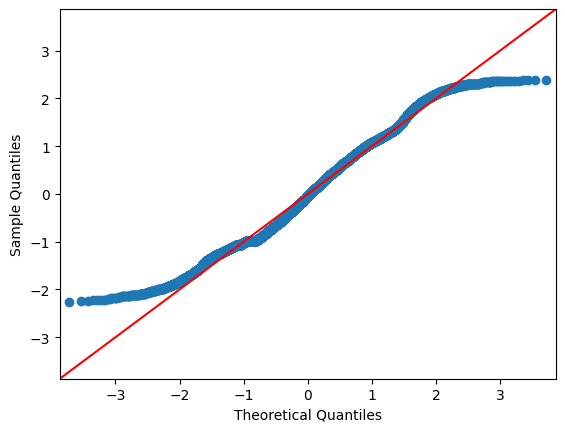

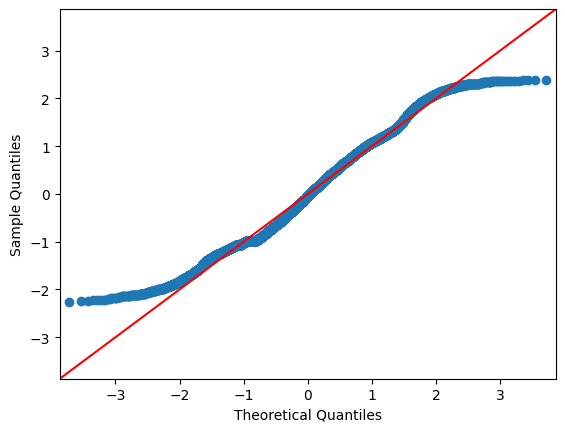

In [123]:
# Visualizing model fit of reduced model
sm.qqplot(data=results_reduced.resid, fit=True, line="45")

## Justification of Model Reduction 

The feature selection procedure that I initially used to reduce the linear regression model was backward stepwise elimination. Backward stepwise elimination is defined as a wrapper method that, “feed the features (variables) for your model and based on the model performance you add/remove the features.” (Middleton, 2022) This was performed by evaluating the initial model variables and their corresponding p-values. I made comparisons and started eliminating variables one by one starting with the highest p-value first until there were no variables that were above 0.05. At the end of the evaluation, I removed a total of ten variables. With this technique, we were able to reduce the model and focus on those variables that have more influence on the dependent variable and get rid of those variables that do not. 

Lastly, I used the Variance Inflation Factor (VIF) to look at multicollinearity and reduce the model further. Multicollinearity is important to address to adhere to the initial assumption that multicollinearity is low. When performing VIF, there were two variables with a value of above 10 which were then dropped from the model. (Sewell, n.d.) 

## Model Comparison 
Looking at the initial model and the reduced model, it appears that the model decreased in strength and validity by a small amount. The model evaluation metric I chose to focus on was the residual standard error. The residual standard error (RSE) is, “Used to measure how well a regression model fits a dataset. In simple terms, it measures the standard deviation of the residuals in a regression model.” (Middleton, 2022) The initial model RSE was 4449.71 and the reduced model RSE was 4455.70. Since a lower RSE is better, it appears that the model got slightly worse after reduction. 

# Results 

__An interpretation of the coefficients of the reduced model__ <br>
HighBlood_numeric: 6684.54 <br>
Stroke_numeric : 340.67

The coefficients listed above are for all remaining variables within the reduced model. These coefficients indicate the effect that each variable has on the dependent variable additional charges in parallel with what direction the effect is. (Middleton, 2022) This means that a one-unit increase of the independent variable results in the value of the coefficients increase in the dependent variable. When an individual is characterized as having high blood pressure, there is an associated increase of additional charges by 6684.54. Similarly, when an individual is characterized as having a stroke there is an increase of additional charges by 340.67. 


__The statistical and practical significance of the reduced model__ <br>
The model does have statistical significance. To determine statistical model significance, I focused on the F-statistic and the p-value. The p-value or Prob(F-statistic) in the summary of the reduced model indicated a value of 0.0. This value is less than the significance level of 0.05 and therefore leads to the conclusion that we reject the null hypothesis and determine that there is a relationship that exists within this model. (Straw, 2023) As mentioned above, another evaluation metric to look at would be the F-statistic which was 2727. Utilizing the F-table of critical values, I discovered that the F-statistic (2727) was greater than the critical value (3) leading to the conclusion that the model is statistically significant. (Straw, 2023) 

Now, looking at practical significance I do not believe that this model is practically significant. This model is looking at the relationship between additional hospital charges and the reduced models independent variables high blood pressure and stroke. The independent variables high blood pressure and stroke are too complex to condemn it to a simple linear regression model. When it comes to medical issues like high blood pressure and stroke, there are almost always other underlying factors and variables to consider that would cause an affect on additional hospital charges. This could be underlying diseases or even certain treatment protocols for these certain medical conditions. 

### Limitations of the data analysis
With data analysis, there are always advantages and disadvantages of each method used. I would like to focus on the methods used for outliers treatment, re-expression of categorical data, backward stepwise elimination, and variance inflation factor (VIF).

__Outliers:__ The treatment I chose for the outliers within this data analysis was replacing them with the median or imputation. This method has drawbacks that stem from causing unnecessary influence on the data, skewing the data improperly, or adding bias. 

__Re-expression of categorical data:__ Due to the process of ordinal encoding, with larger data sets and more unique values this method could turn into a lengthy process in the future. One hot encoding increases dimensionality and decreases optimization with the increase in columns and lack of new information. 

__Backward Stepwise Elimination:__ Using this method could cause the elimination of explanatory variables that do have causal effects on the dependent variable with the lack of statistical significance and, “nuisance variables may be coincidentally significant.” (Smith, 2018)

__Variance Inflation Factor (VIF):__ I performed VIF after backward stepwise elimination which could have had an influence on the VIF values and caused incorrect interpretation. 

# Recommendations 
Based on my results, I would recommend focusing on the creation and maintenance of a more exhaustive list of variables. Due to the complexity of these variables within the model created, it is important to zoom in on other underlying variables like billing practices or necessary treatment protocols when faced with these complicated variables. 